In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

Datapath = "C:\\Users\\HP\\Downloads\\archive (1)\\"
Datafile = "customer_churn_telecom_services.csv"

df =  pd.read_csv(Datapath + Datafile)



In [3]:
# Handling missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [4]:
# Feature engineering
df['TenureGroup'] = pd.cut(df['tenure'], 
                          bins=[0, 12, 24, 48, 72], 
                          labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-6 Years'])

# Converting SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})


In [5]:
# Encoding categorical variables
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']

# Label encoding for binary variables
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encoding for multi-category variables
df = pd.get_dummies(df, columns=[col for col in categorical_cols if col not in binary_cols], drop_first=True)

# Encode target variable
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Select features and target
X = df.drop(['Churn', 'tenure'], axis=1)  # Dropping tenure as we're using TenureGroup
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Baseline accuracy: {1 - y.mean():.2f}")

Training set shape: (4930, 32), Test set shape: (2113, 32)
Baseline accuracy: 0.73



Logistic Regression Results:
Accuracy: 0.7988641741599621
ROC AUC: 0.8400183995810133

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113


Confusion Matrix:
[[1407  145]
 [ 280  281]]


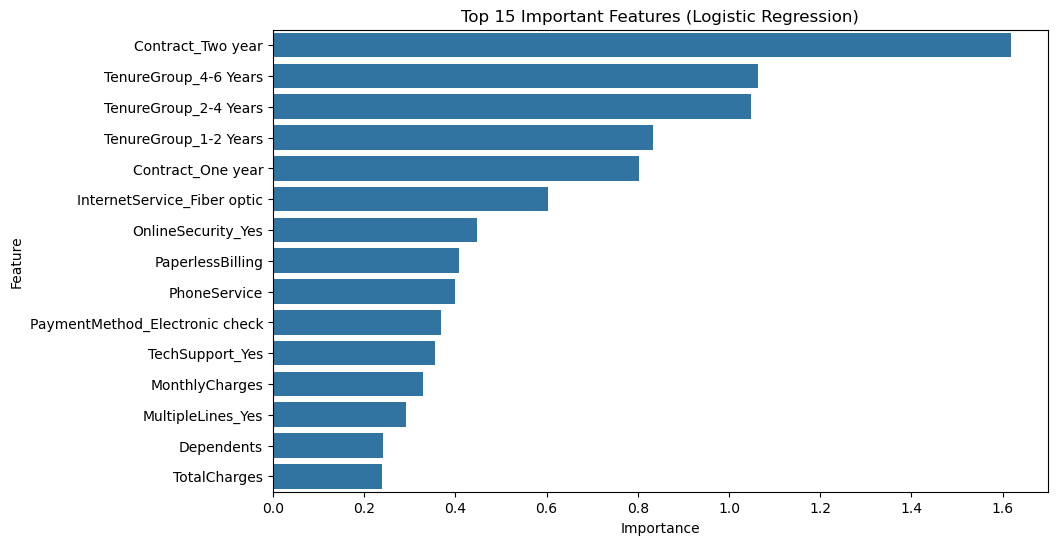

In [6]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Evaluation
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Plot feature importance
lr_coef = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lr.coef_[0])})
lr_coef = lr_coef.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lr_coef)
plt.title('Top 15 Important Features (Logistic Regression)')
plt.show()


Random Forest Results:
Accuracy: 0.7823000473260767
ROC AUC: 0.8179285655218038

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113


Confusion Matrix:
[[1383  169]
 [ 291  270]]


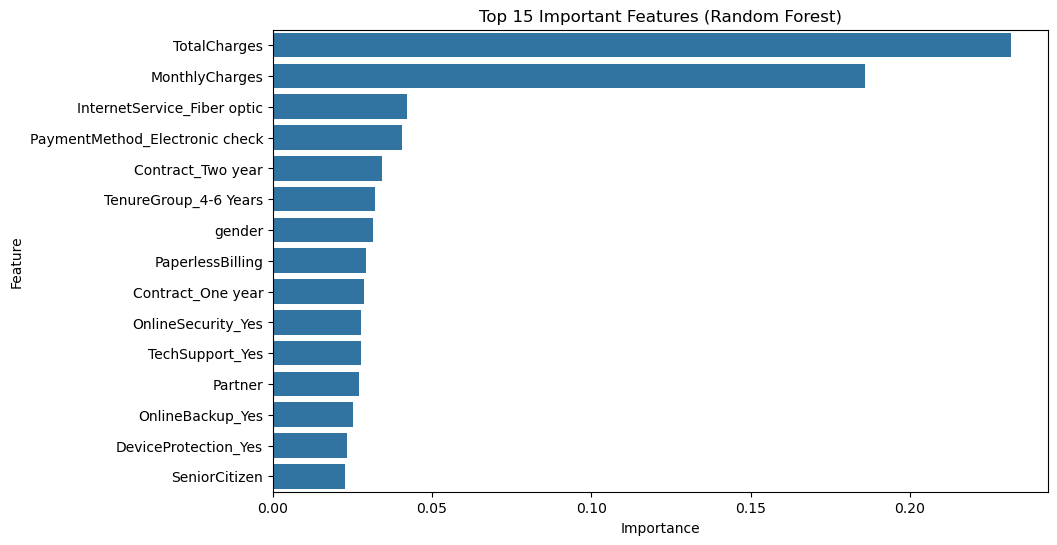

In [7]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance)
plt.title('Top 15 Important Features (Random Forest)')
plt.show()


Gradient Boosting Results:
Accuracy: 0.7927117841930904
ROC AUC: 0.8405702721575978

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113


Confusion Matrix:
[[1403  149]
 [ 289  272]]


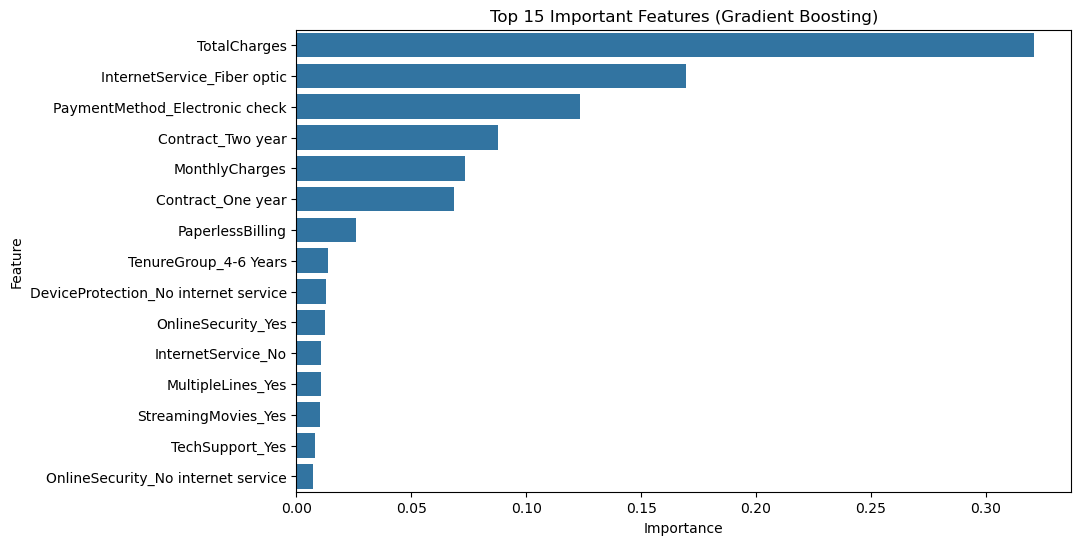

In [8]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

# Evaluation
print("\nGradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

# Feature importance
gb_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb.feature_importances_})
gb_feature_importance = gb_feature_importance.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance)
plt.title('Top 15 Important Features (Gradient Boosting)')
plt.show()

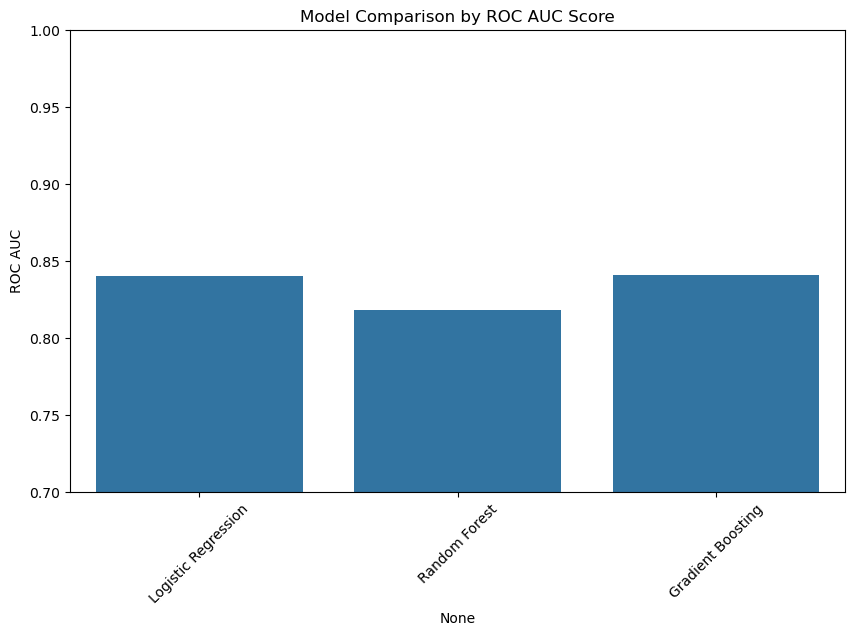

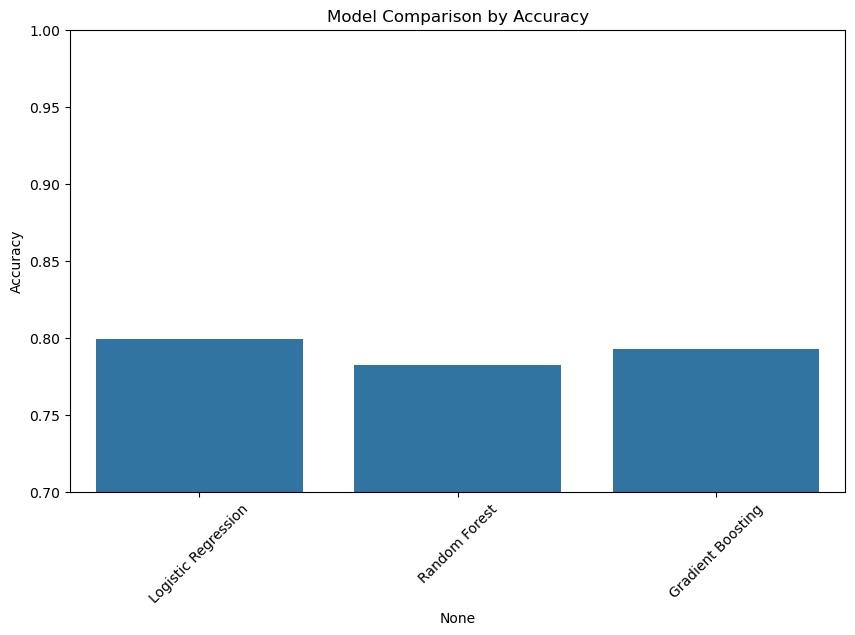

In [9]:
# Compare model performance
models = {
    'Logistic Regression': y_pred_proba_lr,
    'Random Forest': y_pred_proba_rf,
    'Gradient Boosting': y_pred_proba_gb
}

# ROC AUC comparison
roc_scores = {name: roc_auc_score(y_test, preds) for name, preds in models.items()}
roc_df = pd.DataFrame.from_dict(roc_scores, orient='index', columns=['ROC AUC'])

plt.figure(figsize=(10, 6))
sns.barplot(x=roc_df.index, y='ROC AUC', data=roc_df)
plt.title('Model Comparison by ROC AUC Score')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()

# Accuracy comparison
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}
accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_df.index, y='Accuracy', data=accuracy_df)
plt.title('Model Comparison by Accuracy')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()